In [1]:
import numpy as np
from scipy.stats import pearsonr

import NPI

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def flat_without_diagonal(matrix):

    "Flatten the matrix without including the diagonal"

    n = matrix.shape[0]
    flattened = []
    for i in range(n):
        for j in list(range(i)) + list(range(i + 1, n)):
            flattened.append(matrix[i][j])

    return np.array(flattened)

In [3]:
batch_size              = 64
train_set_proportion    = 0.8
ROI_num                 = 20
using_steps             = 3

In [4]:
signals = np.loadtxt('/content/RNN_20nodes_8000steps_seed0_dynamics.txt')
SC      = np.loadtxt('/content/RNN_20nodes_8000steps_seed0_SC.txt')
real_EC = np.loadtxt('/content/RNN_20nodes_8000steps_seed0_real_EC.txt')

In [19]:
inputs, targets = NPI.multi2one(signals, steps = using_steps)

ANN = NPI.ANN_MLP(input_dim = using_steps * ROI_num, hidden_dim = 2 * ROI_num, latent_dim = int(0.8 * ROI_num), output_dim = ROI_num)
# ANN = NPI.ANN_CNN(in_channels = ROI_num, hidden_channels = 3 * ROI_num, out_channels = ROI_num, data_length = using_steps)
# ANN = NPI.ANN_RNN(input_dim = ROI_num, hidden_dim = int(2.5 * ROI_num), latent_dim = int(2.5 * ROI_num), output_dim = ROI_num, data_length = using_steps)
# ANN = NPI.ANN_VAR(input_dim = using_steps * ROI_num, output_dim = ROI_num)

ANN, training_loss, testing_loss = NPI.train_NN(ANN, inputs, targets, batch_size, train_set_proportion, num_epochs = 100, lr = 2.5e-4, l2 = 5e-5)

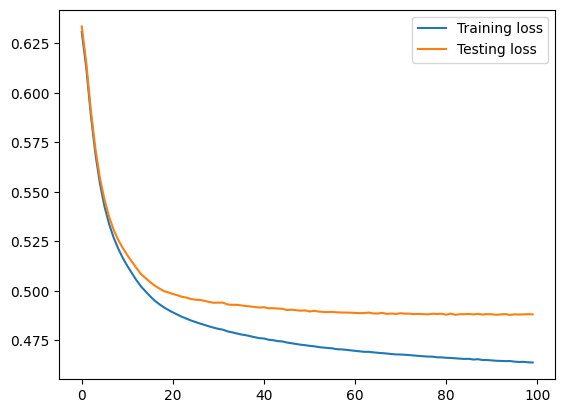

In [20]:
plt.plot(training_loss, label = 'Training loss')
plt.plot(testing_loss, label = 'Testing loss')
plt.legend(loc = 'upper right')
plt.show()

In [21]:
empirical_FC = NPI.corrcoef(signals)
model_FC = NPI.model_FC(ANN, node_num = ROI_num, steps = using_steps)

In [22]:
NPI_EC = NPI.model_EC(ANN, inputs, targets, pert_strength = 1.0)
np.fill_diagonal(NPI_EC, 0)

In [25]:
NPI_Jacobian = NPI.model_Jacobian(ANN, inputs, steps = using_steps)
np.fill_diagonal(NPI_Jacobian, 0)

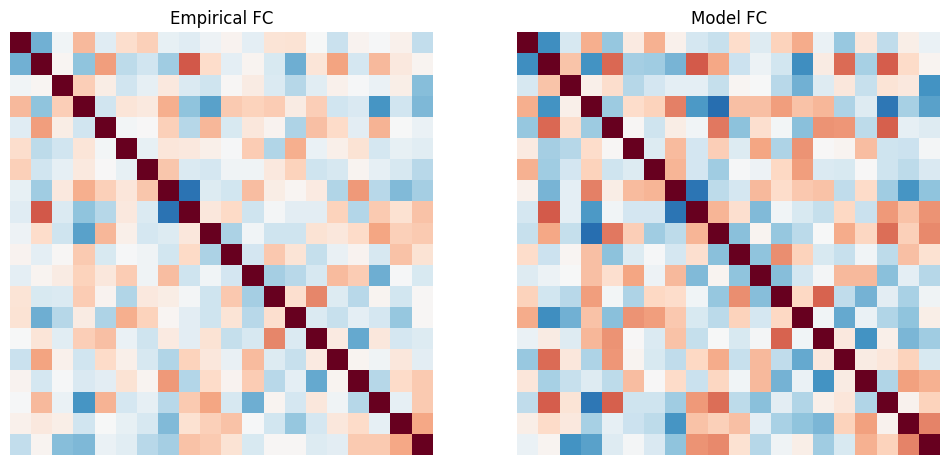

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
sns.heatmap(empirical_FC, ax = ax1, vmin = -0.5, vmax = 0.5, cmap = 'RdBu_r', cbar = False, square = True, xticklabels = False, yticklabels = False)
sns.heatmap(model_FC, ax = ax2, vmin = -1.0, vmax = 1.0, cmap = 'RdBu_r', cbar = False, square = True, xticklabels = False, yticklabels = False)
ax1.set_title('Empirical FC'); ax2.set_title('Model FC')
plt.show()

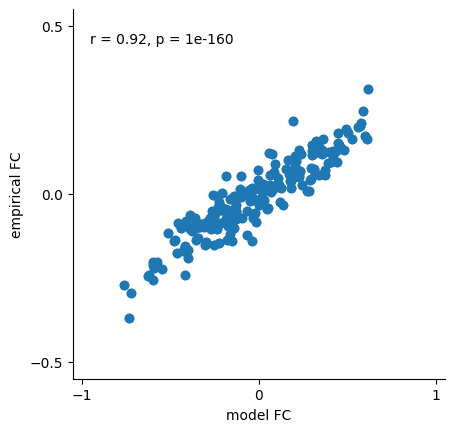

In [24]:
r_value, p_value = pearsonr(flat_without_diagonal(model_FC), flat_without_diagonal(empirical_FC))

plt.figure(figsize = (4.8, 4.8))
plt.scatter(flat_without_diagonal(model_FC), flat_without_diagonal(empirical_FC))

plt.xlim(-1.05, 1.05); plt.xticks([-1.0, 0.0, 1.0]); plt.xlabel('model FC')
plt.ylim(-0.55, 0.55); plt.yticks([-0.5, 0.0, 0.5]); plt.ylabel('empirical FC')
plt.text(-0.95, 0.45, 'r = {:.2f}, p = {:.0e}'.format(r_value, p_value))

ax = plt.gca()
ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)

plt.show()

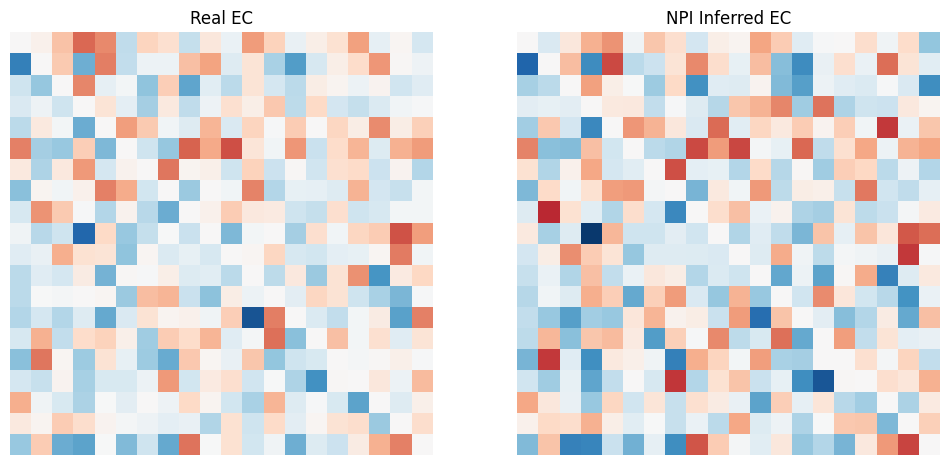

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
sns.heatmap(real_EC, ax = ax1, vmin = -0.2, vmax = 0.2, cmap = 'RdBu_r', cbar = False, square = True, xticklabels = False, yticklabels = False)
sns.heatmap(NPI_EC, ax = ax2, vmin = -0.2, vmax = 0.2, cmap = 'RdBu_r', cbar = False, square = True, xticklabels = False, yticklabels = False)
ax1.set_title('Real EC'); ax2.set_title('NPI Inferred EC')
plt.show()

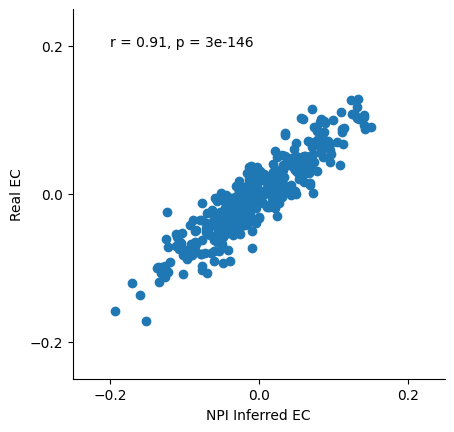

In [27]:
r_value, p_value = pearsonr(flat_without_diagonal(NPI_EC), flat_without_diagonal(real_EC))

plt.figure(figsize = (4.8, 4.8))
plt.scatter(flat_without_diagonal(NPI_EC), flat_without_diagonal(real_EC))

plt.xlim(-0.25, 0.25); plt.xticks([-0.2, 0.0, 0.2]); plt.xlabel('NPI Inferred EC')
plt.ylim(-0.25, 0.25); plt.yticks([-0.2, 0.0, 0.2]); plt.ylabel('Real EC')
plt.text(-0.2, 0.2, 'r = {:.2f}, p = {:.0e}'.format(r_value, p_value))

ax = plt.gca()
ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)

plt.show()

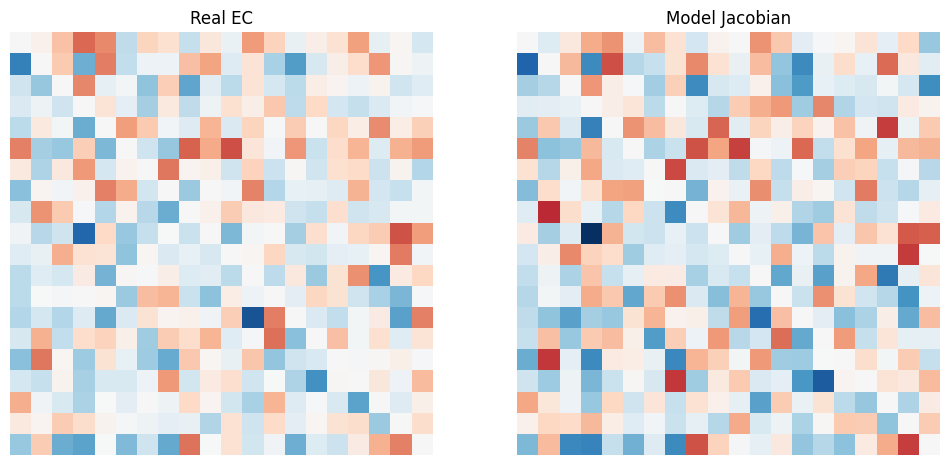

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
sns.heatmap(real_EC, ax = ax1, vmin = -0.2, vmax = 0.2, cmap = 'RdBu_r', cbar = False, square = True, xticklabels = False, yticklabels = False)
sns.heatmap(NPI_Jacobian, ax = ax2, vmin = -0.2, vmax = 0.2, cmap = 'RdBu_r', cbar = False, square = True, xticklabels = False, yticklabels = False)
ax1.set_title('Real EC'); ax2.set_title('Model Jacobian')
plt.show()

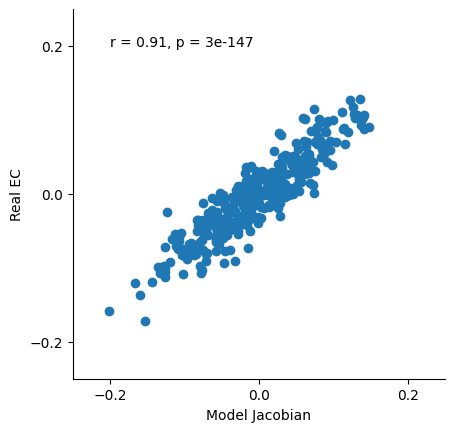

In [29]:
r_value, p_value = pearsonr(flat_without_diagonal(NPI_Jacobian), flat_without_diagonal(real_EC))

plt.figure(figsize = (4.8, 4.8))
plt.scatter(flat_without_diagonal(NPI_Jacobian), flat_without_diagonal(real_EC))

plt.xlim(-0.25, 0.25); plt.xticks([-0.2, 0.0, 0.2]); plt.xlabel('Model Jacobian')
plt.ylim(-0.25, 0.25); plt.yticks([-0.2, 0.0, 0.2]); plt.ylabel('Real EC')
plt.text(-0.2, 0.2, 'r = {:.2f}, p = {:.0e}'.format(r_value, p_value))

ax = plt.gca()
ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)

plt.show()

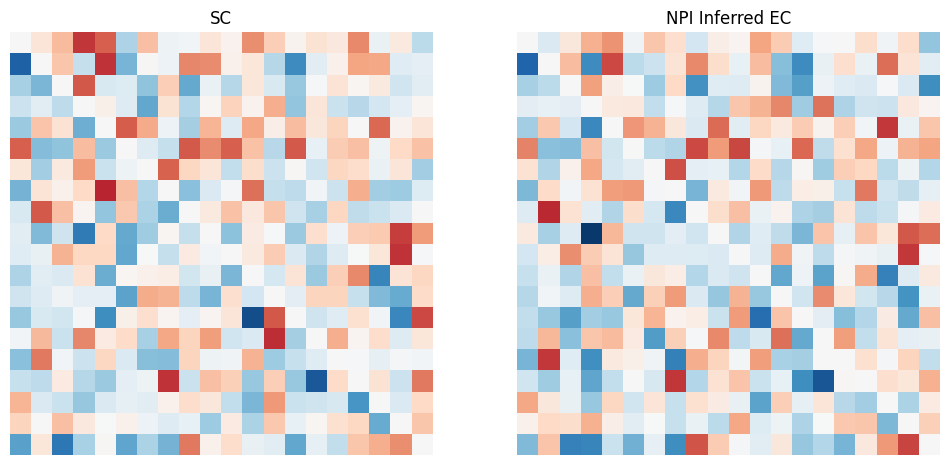

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
sns.heatmap(SC, ax = ax1, vmin = -0.7, vmax = 0.7, cmap = 'RdBu_r', cbar = False, square = True, xticklabels = False, yticklabels = False)
sns.heatmap(NPI_EC, ax = ax2, vmin = -0.2, vmax = 0.2, cmap = 'RdBu_r', cbar = False, square = True, xticklabels = False, yticklabels = False)
ax1.set_title('SC'); ax2.set_title('NPI Inferred EC')
plt.show()

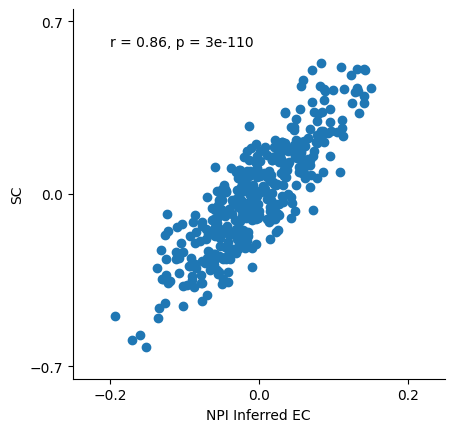

In [31]:
r_value, p_value = pearsonr(flat_without_diagonal(NPI_EC), flat_without_diagonal(SC))

plt.figure(figsize = (4.8, 4.8))
plt.scatter(flat_without_diagonal(NPI_EC), flat_without_diagonal(SC))

plt.xlim(-0.25, 0.25); plt.xticks([-0.2, 0.0, 0.2]); plt.xlabel('NPI Inferred EC')
plt.ylim(-0.75, 0.75); plt.yticks([-0.7, 0.0, 0.7]); plt.ylabel('SC')
plt.text(-0.2, 0.6, 'r = {:.2f}, p = {:.0e}'.format(r_value, p_value))

ax = plt.gca()
ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)

plt.show()